<a href="https://colab.research.google.com/github/tellosofia/Eniac_A-B-Testing/blob/main/Eniac_chi_square_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

#Hypothesis testing: Chi-Square Test



Source: "Practical Statistics for Data Scientists" (124 - 126).

In this notebook we'll show you how to calculate a chi-square test. We'll do this twice.
* First, we'll go through the approach manually so you can see the maths and reasoning behind what we're doing - this should help with comprehension and help you to design better experiments.
* Second, we'll go through the shorter coding way, where a computer will do all the work for you, but won't tell you why, it's a black box of numbers.

# I. The manual approach

Imagine we made **three different versions of a website and each version received 1000 visits last week.** *On each website, we placed a button with a slightly different appearance, but all leading to the same super cool thing*. Now **we want to find out if one of the versions is significantly better than the others.**

In order to determine if one of the website versions is **significantly better** than the others, we can use the **chi-squared test**. This test **helps us understand whether any observed differences in the number of button clicks are statistically significant or not.**

The chi-squared test **compares the observed frequencies**, *which are the actual number of clicks for each website version, with the expected frequencies*, which are the number of clicks we would expect if all versions were equally effective. By analyzing the difference between the observed and expected frequencies, the chi-squared test calculates a statistical value called the chi-squared statistic (similar to the t-score, a.k.a the t-statistic).

If the chi-squared statistic is large enough and exceeds a certain critical value, we can conclude that the differences in button clicks are unlikely to occur by chance alone.


## 1.&nbsp; State the Null Hypothesis and the Alternative Hypothesis.

**Null Hypothesis ($H_0$):** The click rate on each website (A, B, and C) is equal.

**Alternative Hypothesis ($H_A$):** At least one of the websites has a significantly different click rate compared to the others, either better or worse.

## 2.&nbsp; Select an appropriate significance level alpha ($\alpha$).

Commonly used levels are 0.1, 0.05 and 0.01.

In our case, as we don't expect the color of a button to have a profound impact on the course of history, a comfortable alpha level of 0.1 would be suitable.

In [2]:
alpha = 0.1

## 3.&nbsp; Collect Data that is random and independent

We will assume that this experiment was carefully designed, ensuring that the data collected is random and independent, which is crucial for reliable statistical analysis.

To recap, we created three distinct versions of a website, and each version received 1000 visits last week. On each website, we implemented a button with a slightly different appearance that directed users to the same super cool thing. Below are the results, showing the number of people who clicked on the button, and didn't click on the button, for each website version.

In [3]:
Click = [14, 8, 12]
No_click = [986, 992, 988]

observed_results = pd.DataFrame([Click, No_click],
                                  columns = ["A", "B", "C"],
                                  index = ["Click", "No-click"])
observed_results

,A,B,C
Click,14,8,12
No-click,986,992,988


In [4]:
observed_results.iloc[0,0] # equivalent to [i, j]

14

## 4.&nbsp; Calculate the test result

Comparing the observed frequencies to the expected frequencies in one or more categories of a contingency table is done using a Chi-squared test.

The associated test statistic is the chi-squared statistic:
$\chi^2_c = \sum_{\substack{0\le i\le n\\0\le j\le r}}\frac{(O_{ij}-E_{ij})^2} {E_{ij}}$

---

n = total number of columns

r = total number of rows

c = degrees of freedom

$O_{ij}$ = observed value in the ith column and jth row

$E_{ij}$ = expected value in the ith column and jth row

---

In the case  of equal frequencies, we would have expected all of the three versions to have equal click and no-click rates. In that case, the difference between observed and expected value would have been 0 for all i, as well as the sum, i.e. the test statistic.

The square root of each of the components of the test statistic is called the **Pearson residual**. It is a normalized measure of how different the observed and the expected values are: $\frac{O_{ij}-E_{ij}}{\sqrt{E_{ij}}}$.

To get the test statistic, we will need to calculate the Pearson residual for each row-column combination, i.e. for each cell in the contingency table.

And to calculate the Pearson residuals, we will need to know the expected values for each of these cells. "Expected" means a perfectly equal distribution of clicks and no-clicks across the three versions, as stated by the Null Hypothesis. In order to calculate these values, we need to know the total numbers of clicks and no-clicks each.

### n = total number of columns

In [5]:
number_of_columns = observed_results.shape[1]
number_of_columns

3

### r = total number of rows

In [6]:
number_of_rows = observed_results.shape[0]
number_of_rows

2

### c = degrees of freedom

For a chi-squared test of independence, the degrees of freedom are calculated using the formula:

c = (number of rows - 1) * (number of columns - 1)

In [7]:
degrees_of_freedom = (number_of_rows - 1) * (number_of_columns - 1)
degrees_of_freedom

2

Let's plot a few chi squared distributions with different degrees of freedom to see how they differ from t-distributions.

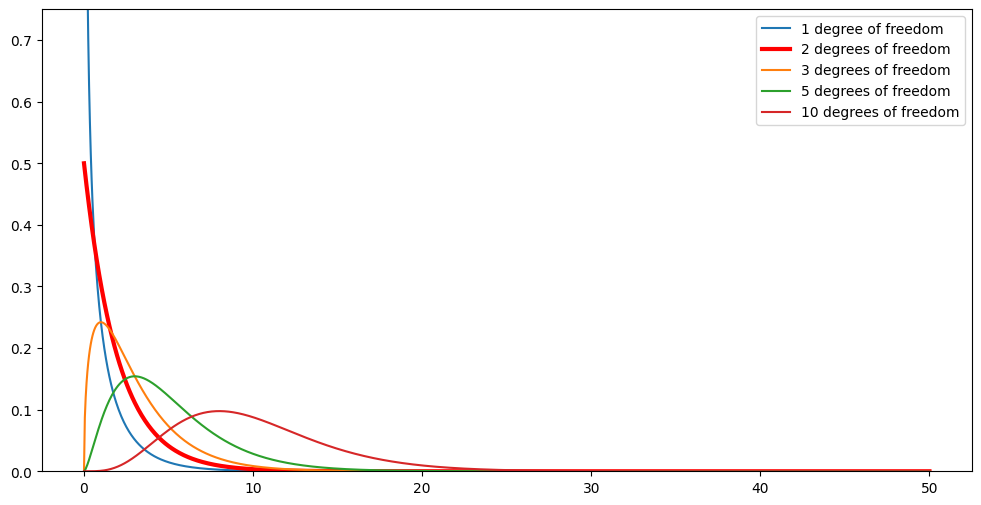

In [8]:
#@title Chi-squared distributions with different degrees of freedom

import numpy as np
from scipy.stats import chi2

plt.figure(figsize=(12,6))
# Create a linear space from 0 to 50 with 1000 intervals for our x-axis.
xt = np.linspace(0,50,1000)
# Show values on the y-axis between 0 and 0.75.
plt.ylim(0, 0.75)
# Plot chi-squared distributions with different degrees of freedom.
plt.plot(xt, chi2.pdf(xt,1), label="1 degree of freedom")
plt.plot(xt, chi2.pdf(xt,2), color="red", lw=3, label="2 degrees of freedom")
plt.plot(xt, chi2.pdf(xt,3), label="3 degrees of freedom")
plt.plot(xt, chi2.pdf(xt,5), label="5 degrees of freedom")
plt.plot(xt, chi2.pdf(xt,10), label="10 degrees of freedom")
plt.legend()
plt.show()

### $O_{ij}$ = observed value in the ith column and jth row

Here, i and j represent integers. We are interested in obtaining the observed values from each cell of our `observed_results` DataFrame. In this case, i ranges from 0 to 2, representing the three columns of the DataFrame, while j ranges from 0 to 1, representing the two rows. To refresh our memory on the specific values, let's load the table.

In [9]:
observed_results

,A,B,C
Click,14,8,12
No-click,986,992,988


### $E_{ij}$ = expected value in the ith column and jth row


Once again, i and j represent integers that indicate the coordinates of a value within the DataFrame. However, this time our focus is on obtaining the expected value. The expected value represents what each value would have been in a theoretical world where there is absolutely no difference in the influence of the different buttons.

First, let's have a look at the expected values as a contingency table.

In [10]:
# Total number of clicks.
total_clicks = observed_results.iloc[0].sum()

# Total number of no-clicks.
total_no_clicks = observed_results.iloc[1].sum()

#####

# The expected number of clicks for each version is the total number of clicks divided by the number of versions.
expected_clicks = total_clicks / 3

# The expected number of no-clicks for each version is the total number of no-clicks divided by the number of versions.
expected_no_clicks = total_no_clicks / 3

#####

# Display the data in the form of a contingency table.
expected_results = pd.DataFrame([[expected_clicks for _ in range(3)],
                                [expected_no_clicks for _ in range(3)]],
                                columns = ["A", "B", "C"],
                                index = ["Click", "No-click"])

expected_results

,A,B,C
Click,11.333333,11.333333,11.333333
No-click,988.666667,988.666667,988.666667


This matrix constitutes what is considered to be the normal, as if they received the same number of visitors. The average from the n variants, in this case 3, so we sum and divide everything by 3.

### Bringing all the values together in the formula

Remember, our formula is:

$\sum_{\substack{0\le i\le n\\0\le j\le r}}\frac{(O_{ij}-E_{ij})^2} {E_{ij}}$

Which means that for each cell of the contingent table, we want to minus the expected value from the observed value, square this number, and then divide it by the expected value. By adding together this result for each cell, we get the chi squared statistic.

In [11]:
# Pearson Residual
import numpy as np
def pearson_residuals(obs, exp):
    return ((obs - exp)**2) / (exp)

R = pearson_residuals(observed_results, expected_results)
R

,A,B,C
Click,0.627451,0.980392,0.039216
No-click,0.007193,0.011238,0.000450


The **chi-square statistic** is the sum of the squared Pearson residuals

In [12]:
R['A'].sum()

0.6346436079489106

In [13]:
chi_squared = R['A'].sum() + R['B'].sum() + R['C'].sum()      # chi square score
chi_squared

1.6659394708658917

Let's see where the chi-squared test statistic is in the plot of the chi-squared distribution.

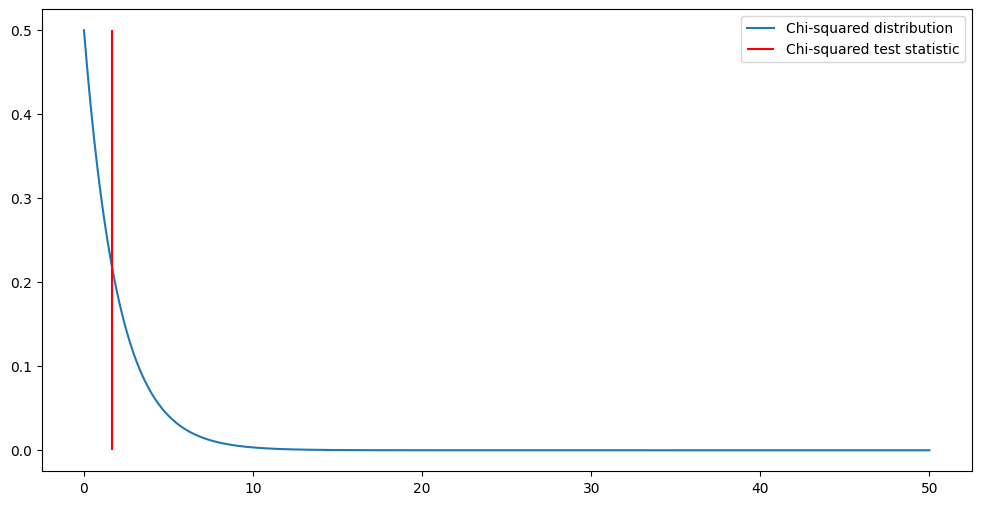

In [14]:
#@title Chi-squared distribution and test statistic
plt.figure(figsize=(12,6))
# Create a linear space from 0 to 50 with 1000 intervals for our x-axis.
xt = np.linspace(0,50,1000)
# Plot a chi-squared distribution with the degrees of freedom from our sample.
plt.plot(xt, chi2.pdf(xt,degrees_of_freedom), label="Chi-squared distribution")
# Add a vertical line for the chi-squared test statistic.
plt.vlines(chi_squared, ymin=0, ymax=max(chi2.pdf(xt,degrees_of_freedom)), color="red", label="Chi-squared test statistic")
plt.legend()
plt.show()

## 5.&nbsp; Interpret the test result

Not too long ago, people used large tables to look up the critical values associated with a certain level of alpha, such as the one for the chi-squared test statistic below from [here](https://www.statology.org/how-to-read-chi-square-distribution-table/).

In the columns at the top, you need to select the level of alpha. In our case, alpha is 0.1.

Then you select the degrees of freedom of the test statistic's distribution in the first row. For any distribution with a different degree of freedom than the ones listed, the critical value will only be an approximation. In our case, the degrees of freedom is 2.

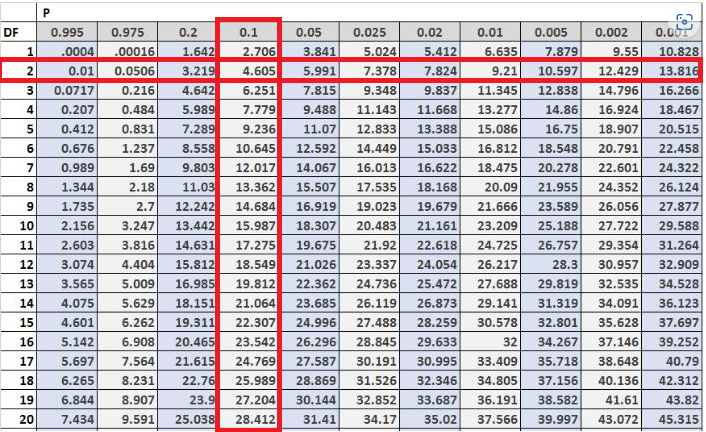

In [15]:
critical_value = 4.605

Let's remind ourselves of the chi-squared statistic

In [16]:
chi_squared

1.6659394708658917

Does this mean that we accept or reject the null hypothesis?

Let's visualise the chi-squared distribution with our test statistic and the critical value to make more sense of these numbers.

Now, we aim to incorporate the critical value to identify the critical region.

Observe that the blue shaded area beneath the distribution curve encompasses all x-axis values that are more extreme than our critical value. This area represents alpha and corresponds to approximately 10% of the total area under the curve.

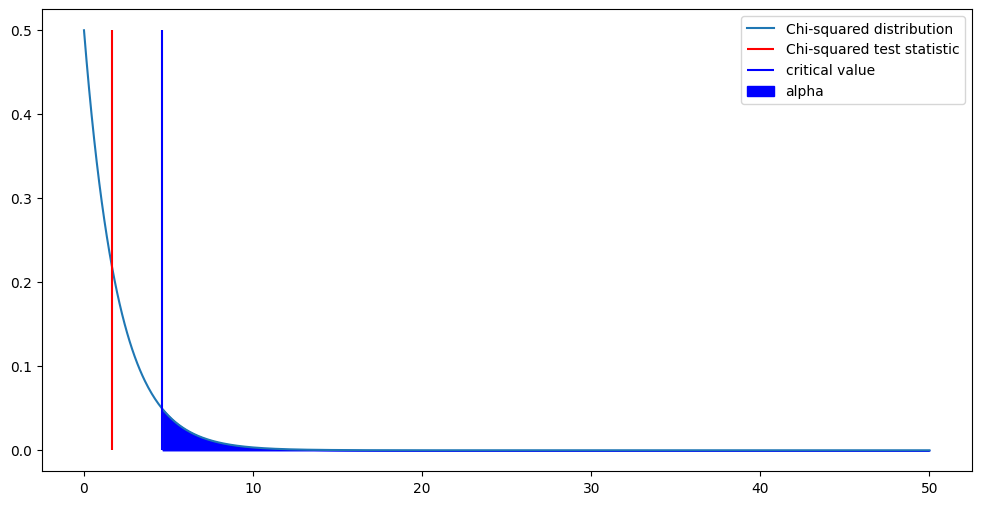

In [17]:
# @title Chi-squared distribution, test statistic and critical region
plt.figure(figsize=(12,6))
# Plot a chi-squared distribution with the degrees of freedom from our sample.
plt.plot(xt, chi2.pdf(xt,degrees_of_freedom), label="Chi-squared distribution")
# Add a vertical line for the chi-squared test statistic.
plt.vlines(chi_squared, ymin=0, ymax=max(chi2.pdf(xt,degrees_of_freedom)), color="red", label="Chi-squared test statistic")
# Add vertical line for the critical value.
plt.vlines(critical_value, ymin=0, ymax=max(chi2.pdf(xt,degrees_of_freedom)), color="blue", label="critical value")
# Shade the area under the curve for values more extreme than the critical value (= alpha).
plt.fill_between(xt, chi2.pdf(xt,degrees_of_freedom), where=(xt>critical_value), color= "b", label="alpha")
plt.legend()
plt.show()

** The test statistic does not fall within the critical region as it is not more extreme than the critical value. **

** Therefore, we do not reject the Null Hypothesis. **

Based on this analysis, we cannot conclude that any of the three different versions of the website performed significantly better or worse than the others. In fact, it is highly probable that they are perceived as nearly identical by the website visitors.

# II.&nbsp;The coder's approach

The faster way is to use [scipy's function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.chi2_contingency.html) to perform chi-squared tests.

To determine whether or not to reject the Null Hypothesis, it is common to compare the alpha to the so-called p-value (instead of comparing the test statistic to the critical region).

> **Note**: Whether you compare alpha to the p-value or the test statistic to the critical values/regions is a matter of personal taste. The result itself will always be the same.

You can see this in the chart below:

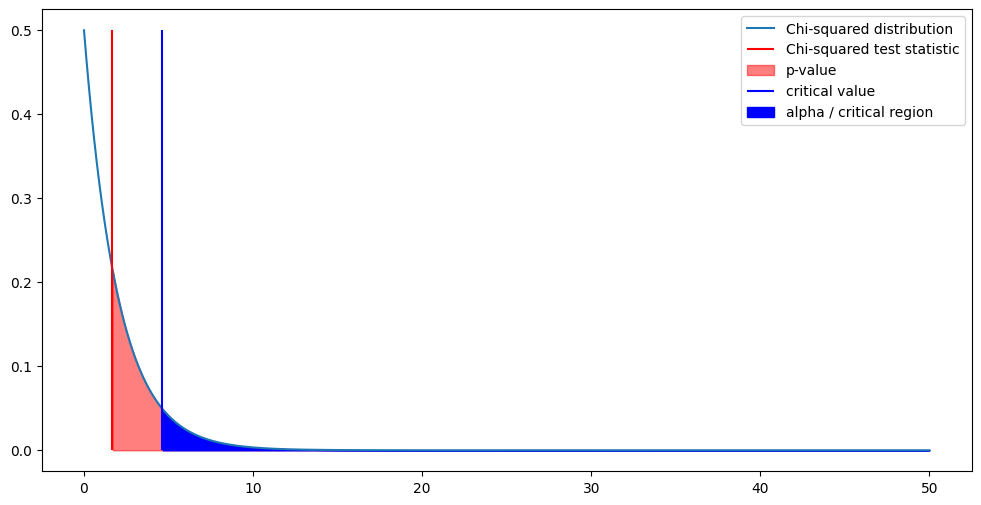

In [18]:
# @title Chi-squared distribution, test statistic, critical value and alpha
plt.figure(figsize=(12,6))
# Plot a chi-squared distribution with the degrees of freedom from our sample.
plt.plot(xt, chi2.pdf(xt,degrees_of_freedom), label="Chi-squared distribution")
# Add a vertical line for the chi-squared test statistic.
plt.vlines(chi_squared, ymin=0, ymax=max(chi2.pdf(xt,degrees_of_freedom)), color="red", label="Chi-squared test statistic")
# Shade the region in the tails that is more extreme than the test statistic (= p-value).
plt.fill_between(xt, chi2.pdf(xt,degrees_of_freedom), where=(xt>chi_squared), color= "r", alpha=0.5, label="p-value")
# Add vertical line for the critical value.
plt.vlines(critical_value, ymin=0, ymax=max(chi2.pdf(xt,degrees_of_freedom)), color="blue", label="critical value")
# Shade the area under the curve for values more extreme than 4.6 (= alpha).
plt.fill_between(xt, chi2.pdf(xt,degrees_of_freedom), where=(xt>critical_value), color= "b", label="alpha / critical region")
plt.legend()
plt.show()

In [19]:
chisq, pvalue, df, expected = chi2_contingency(observed_results)
chisq

1.6659394708658917

In [20]:
pvalue      # the more you go to the right the more you are from being homogeneus

0.4347562562343731

The p-value means that the area es 43%, meaning that if I'm going to reject my null hypothesis
Area under the curve at the - video

In [21]:
df

2

In [22]:
expected

array([[ 11.33333333,  11.33333333,  11.33333333],
       [988.66666667, 988.66666667, 988.66666667]])

Check whether the chi-squared test statistic calculated manually and the one calculated using scipy are the same.

In [23]:
chi_squared == chisq

True

SUCCESS!

In [24]:
if pvalue > alpha:
  print("The p-value is larger than alpha.")
else:
  print("The p-value is smaller than alpha.")

The p-value is larger than alpha.


Does this mean that we should reject the Null Hypothesis - or not?

Since the p-value is (much) larger than alpha, we do not reject the Null Hypothesis.

# III.&nbsp;Exercise

You have tested 4 versions A, B, C and D of the "SHOP NOW" button on Eniac's website.

After the experiment is complete with 1500 visits each, these are the results:

- Version A: 134 clicks, 1500 visits.
- Version B: 102 clicks, 1500 visits.
- Version C: 78 clicks, 1500 visits.
- Version D: 129 clicks, 1500 visits.

### 1.&nbsp; State the Null and the Alternative Hypotheses.

Null Hypothesis ($H_0$): All of the versions performed as well as one another

Alternative Hypothesis ($H_A$): at least one of the versions has a significantly better or worse click rate than the others

### 2.&nbsp;Define your alpha.

In [25]:
alpha = 0.1

### 3.&nbsp; Collect data that is random and independent

In [26]:
clicks = [134, 102, 78, 129]
no_clicks = [1500-134, 1500-102, 1500-78, 1500-129]

eniac_results = pd.DataFrame([clicks, no_clicks],
                             columns = ['A', 'B', 'C', 'D'],
                             index = ['clicks', 'no-clicks'])

eniac_results

,A,B,C,D
clicks,134,102,78,129
no-clicks,1366,1398,1422,1371


In [27]:
chisq, pvalue, df, expected = chi2_contingency(eniac_results)
chisq, pvalue, df, expected

(19.720109791770167,
 0.00019398896739266587,
 3,
 array([[ 110.75,  110.75,  110.75,  110.75],
        [1389.25, 1389.25, 1389.25, 1389.25]]))

In [28]:
if pvalue > alpha:
  print("The p-value is larger than alpha, we fail to reject the null hypothesis")
else:
  print("The p-value is smaller than alpha, we reject the null hypothesis")

The p-value is smaller than alpha, we reject the null hypothesis


In [29]:
# So we reject the null hypothesis

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
